In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load oecd data from github repository

'''
TO-DO when merged: point to the corresponding url
url = 'https://raw.githubusercontent.com/OpenGeoScales/ogs-data-exploration/main/data/ghg-emissions/ademe/beges/assessments.csv'
'''

# From now, we just take it from the branch
url = "../../../data/ghg-emissions/oecd/AIR_GHG_07042021221914030.csv"
oecd_dataset = pd.read_csv(url, index_col=0)

In [3]:
oecd_dataset.head()

,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
COU,,,,,,,,,,,,,,,,
AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,424998.381,NaN,NaN
AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426015.210,NaN,NaN
AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430216.380,NaN,NaN
AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430612.556,NaN,NaN
AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430653.332,NaN,NaN


In [4]:
# Get df shape
row, col = oecd_dataset.shape
print(row)
print(col)

52583
16


# Pollutant coverage

In [5]:
# Distribution of pollutants
oecd_dataset.groupby(['Pollutant']).size()

Pollutant
Carbon dioxide                       3464
Greenhouse gases                    32328
Hydrofluorocarbons                   2811
Methane                              3464
Nitrogen trifluoride                  791
Nitrous oxide                        3464
Perfluorocarbons                     2795
Sulphur hexafluoride                 3145
Unspecified mix of HFCs and PFCs      321
dtype: int64

In [6]:
# Information by pollutant
pollutants = oecd_dataset["Pollutant"].unique()
for pol in pollutants:
    print(pol)
    print(oecd_dataset[oecd_dataset["Pollutant"]==pol]["Variable"].unique())
    print()

Greenhouse gases
['Total  emissions excluding LULUCF'
 'Total GHG excl. LULUCF, Index 1990=100'
 'Total GHG excl. LULUCF per capita' '5 - Waste'
 '2- Industrial processes and product use' '1 - Energy' '3 - Agriculture'
 '6 - Other' 'Total GHG excl. LULUCF per unit of GDP'
 '1A1 - Energy Industries'
 'Land use, land-use change and forestry (LULUCF)'
 '1A4 - Residential and other sectors' '1A5 - Energy - Other'
 '1B - Fugitive Emissions from Fuels'
 '1A2 - Manufacturing industries and construction' '1A3 - Transport'
 'Total  emissions including LULUCF'
 'Total GHG excl. LULUCF, Index 2000=100'
 '1C - CO2 from Transport and Storage'
 'Agriculture, Forestry and Other Land Use (AFOLU)'
 '1A4 - Residential and other sectors\t']

Carbon dioxide
['Total  emissions excluding LULUCF'
 'Total GHG excl. LULUCF, Index 2000=100'
 'Total GHG excl. LULUCF, Index 1990=100']

Methane
['Total  emissions excluding LULUCF'
 'Total GHG excl. LULUCF, Index 2000=100'
 'Total GHG excl. LULUCF, Index 1990=100']

# Spatial coverage

In [7]:
# Spatial coverage: Number of countries
n_countries = oecd_dataset["Country"].nunique()
n_countries

48

# Temporal coverage

In [8]:
# Temporal coverage: Number of considered years
print(oecd_dataset['Year'].min())
print(oecd_dataset['Year'].max())

1990
2018


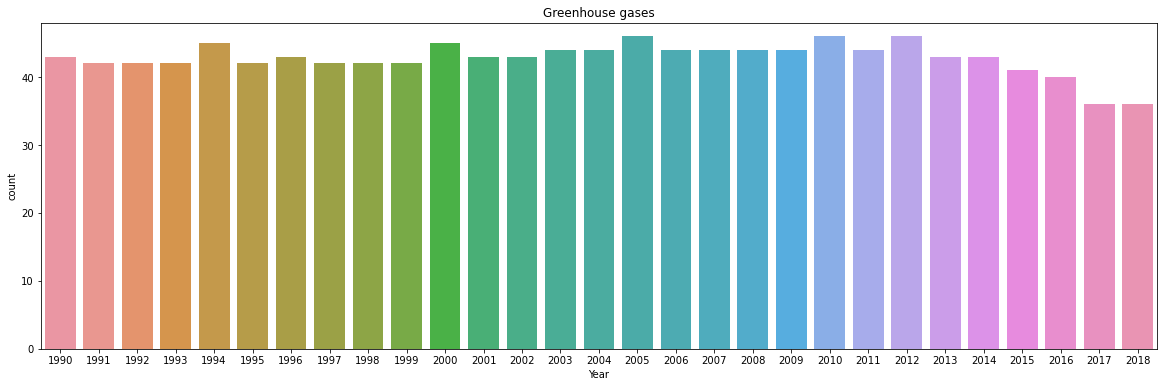

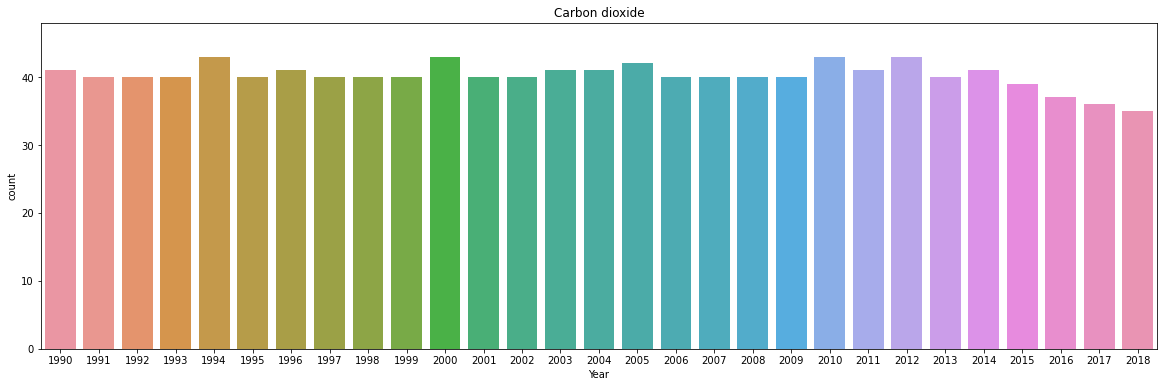

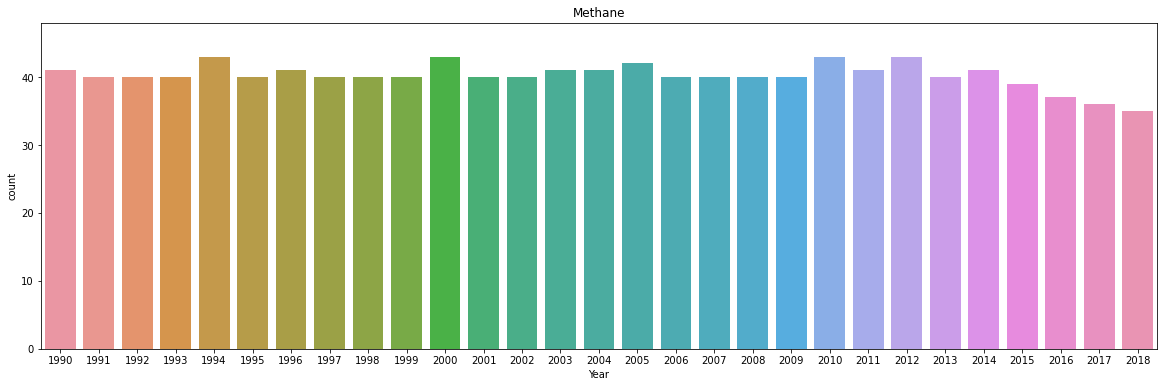

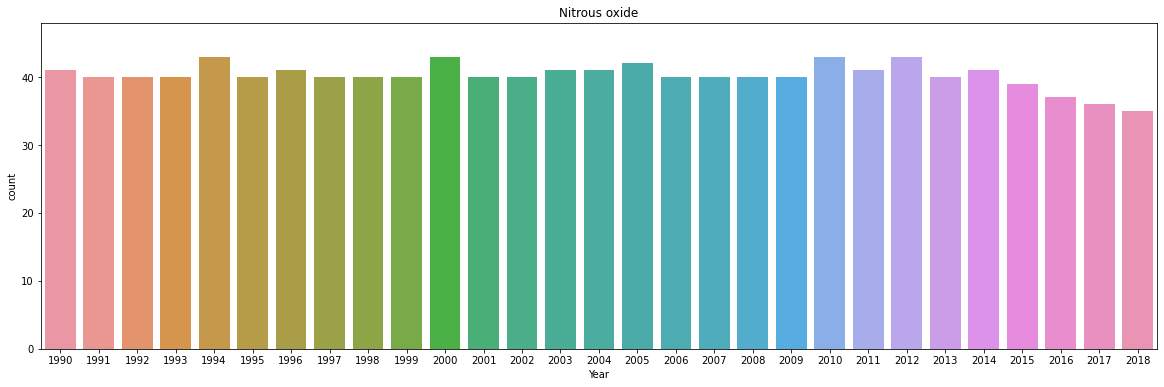

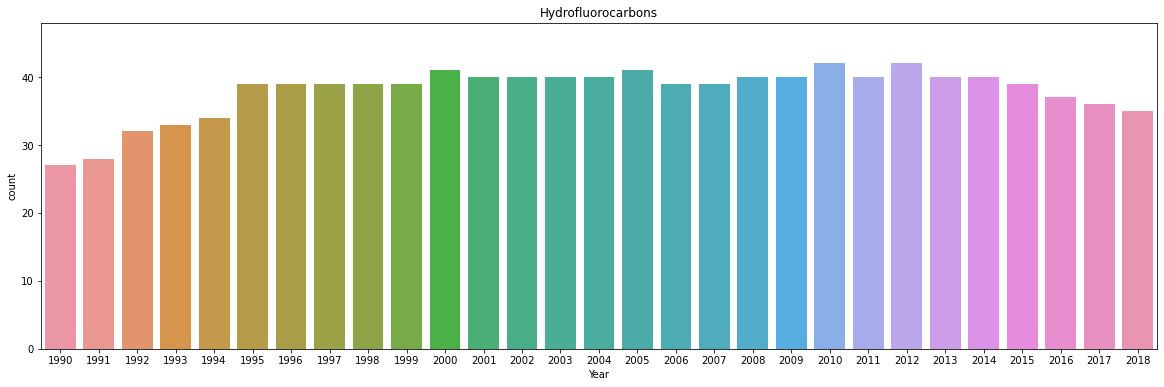

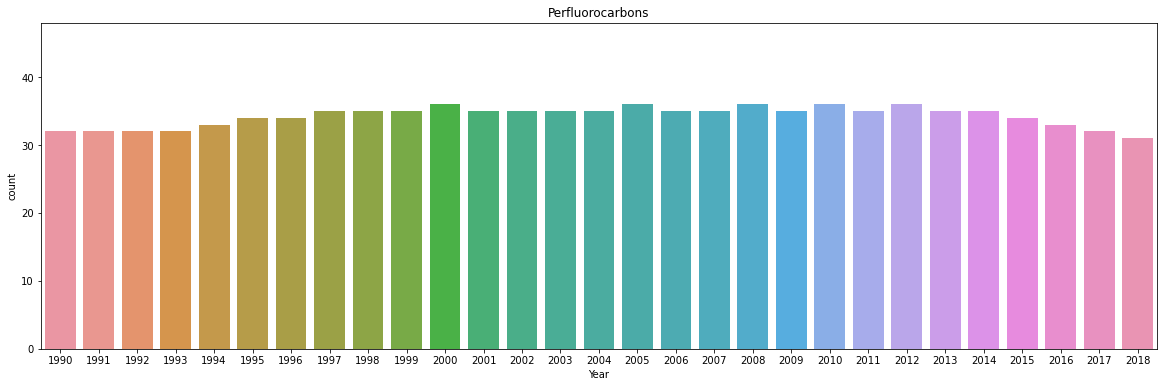

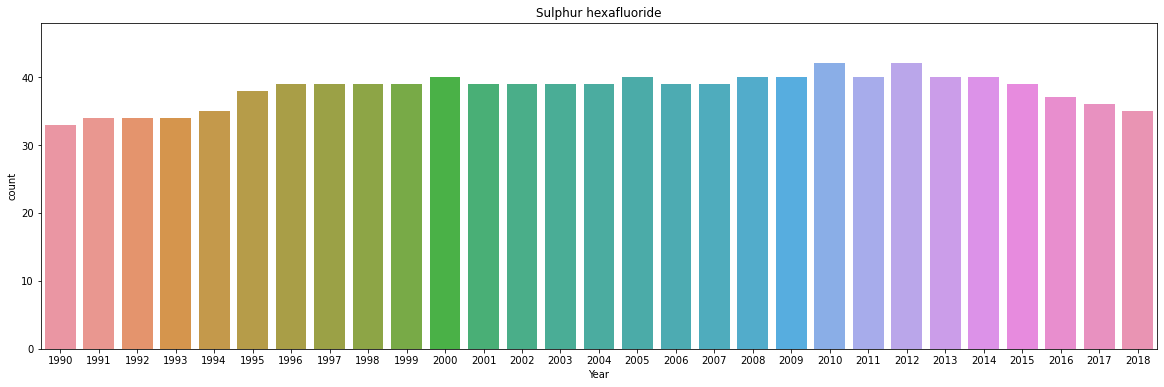

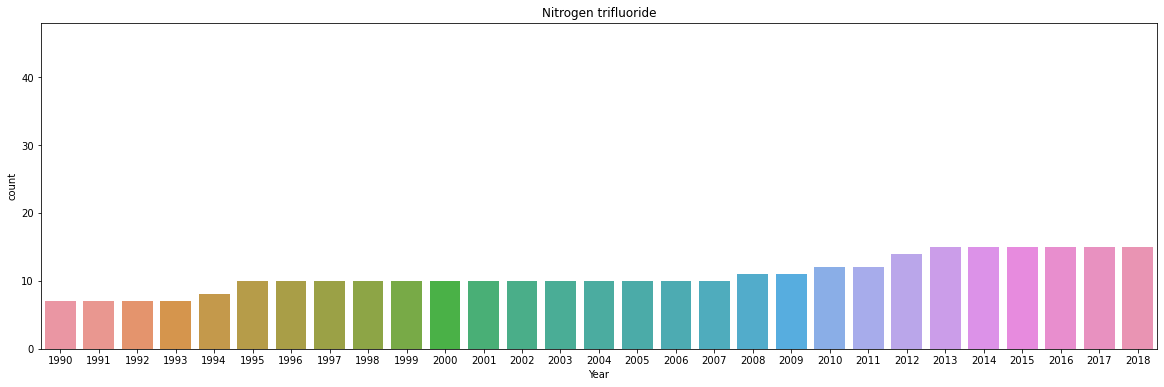

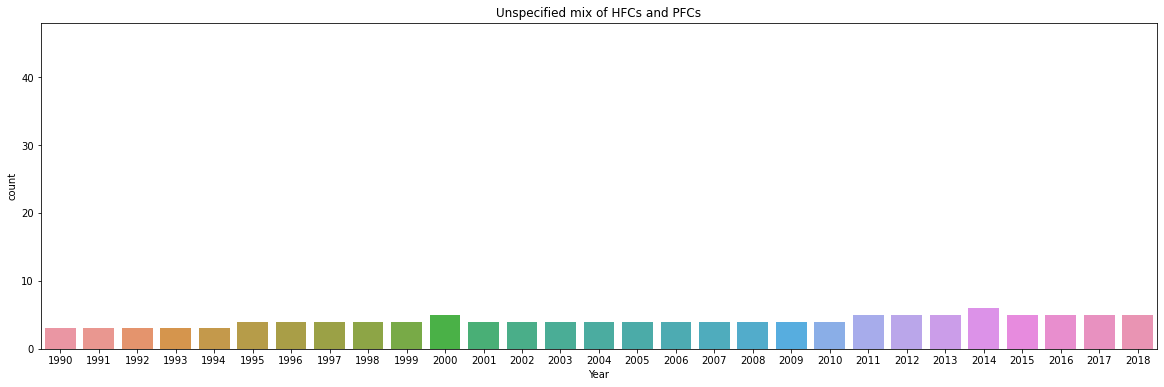

In [9]:
# Plot number of reporting countries per year and per pollutant, taking "Total  emissions excluding LULUCF" as variable
for i in range(len(pollutants)):
    plt.figure(i, figsize=(20,6))
    plt.title(pollutants[i])
    sns.countplot(x="Year", data=oecd_dataset.loc[(oecd_dataset["Pollutant"]==pollutants[i]) & (oecd_dataset["VAR"]=="TOTAL")])
    plt.ylim(0, n_countries)